In [1]:
import os

while '.gitignore' not in os.listdir():
    os.chdir('..')
# print(os.listdir())


from jax import numpy as jnp
from jax.image import resize
from src import img_utils, img_plot_utils
import matplotlib.pyplot as plt
import cv2

(800, 720, 3)


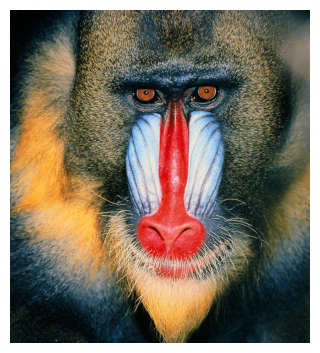

In [2]:
image = cv2.imread('data/mandrill.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = jnp.array(image)
print(image.shape)
_ = img_plot_utils.plot_image(image, filename='results/mandrill.png')

# Create the Laplacian Pyramids here

This is taken from the YouTube video: https://www.youtube.com/watch?v=1GFQ4V8cV0o&list=PLhwIOYE-ldwL6h-peJADfNm8bbO3GlKEy&index=30

In [3]:
image1 = image.copy()
blur_filter = jnp.array([1/16, 4/16, 6/16, 4/16, 1/16])
number_of_pyramids = 4

In [5]:
gaussian_pyramid, laplacian_pyramid = img_utils.laplacian_pyramids(image1.copy(), blur_filter, number_of_pyramids)

plot the Gaussian pyramids

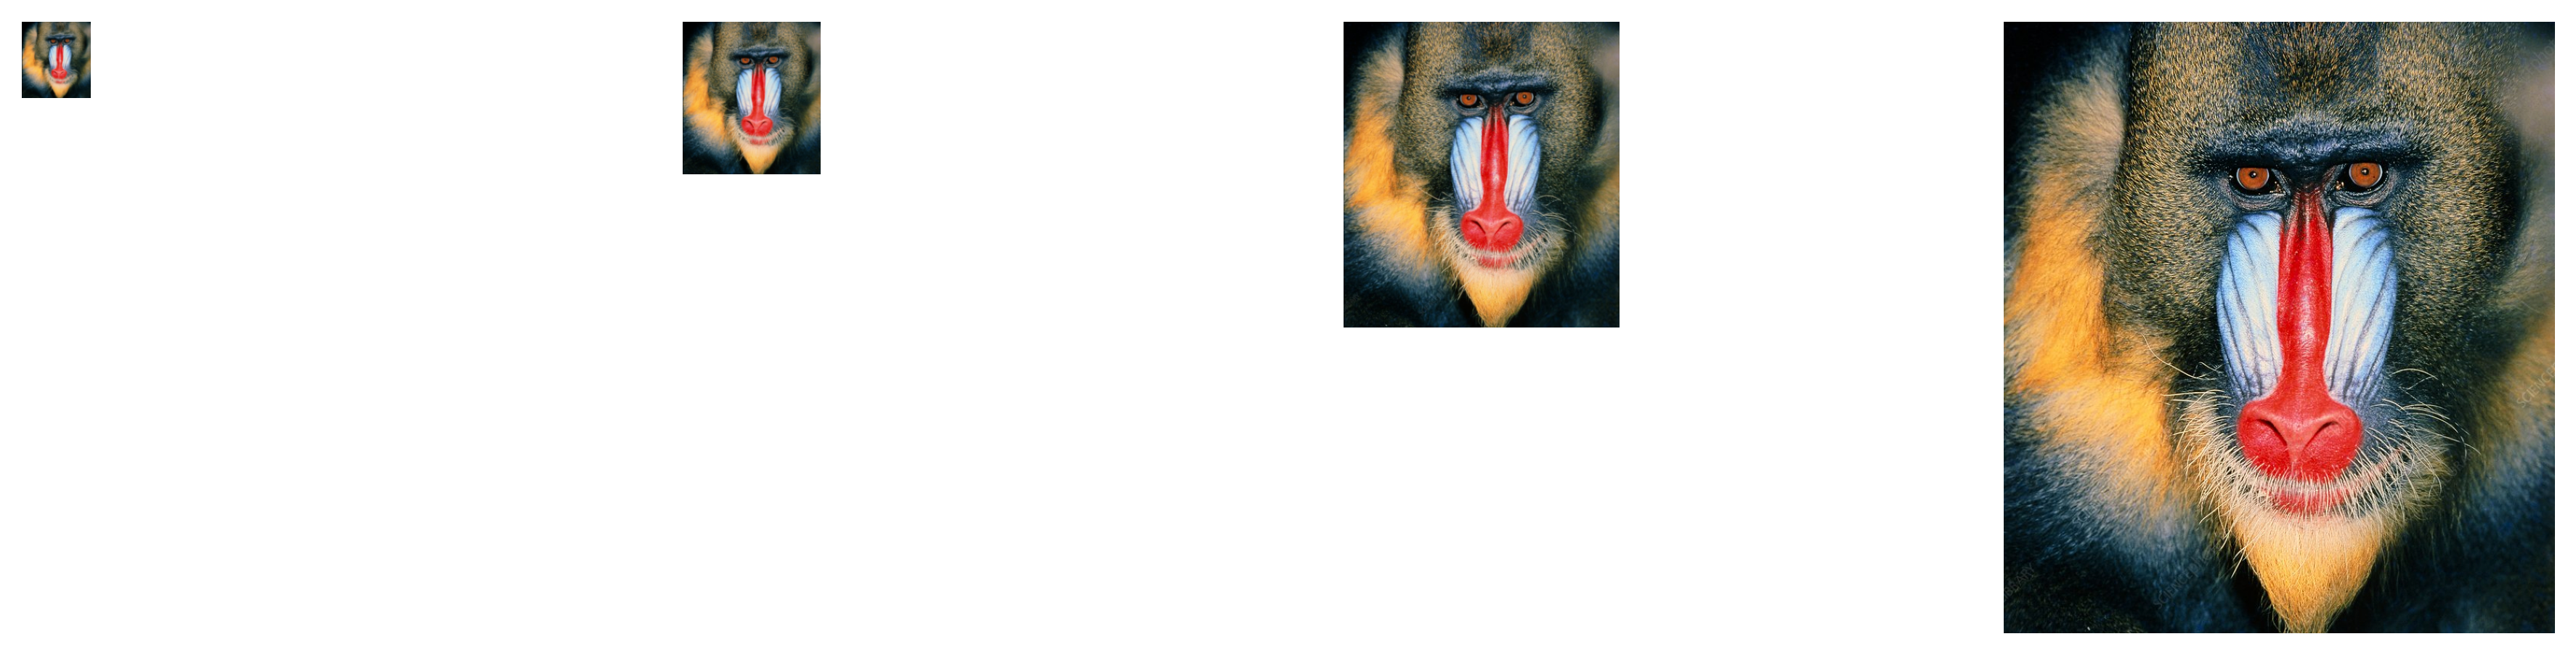

In [6]:
fig, axs = plt.subplots(
    nrows=1, ncols=number_of_pyramids, figsize=(15, 7),
    dpi=300, sharex = True, sharey = True
)

for i, ax in enumerate(axs):
    ax.imshow(gaussian_pyramid[number_of_pyramids - i -1 ])
    ax.set_xticks([])
    ax.set_yticks([])
    for side in ['top', 'right', 'left', 'bottom']:
        ax.spines[side].set_visible(False)

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-74.30426..79.282616].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-74.40161..103.90845].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-141.95728..172.52155].


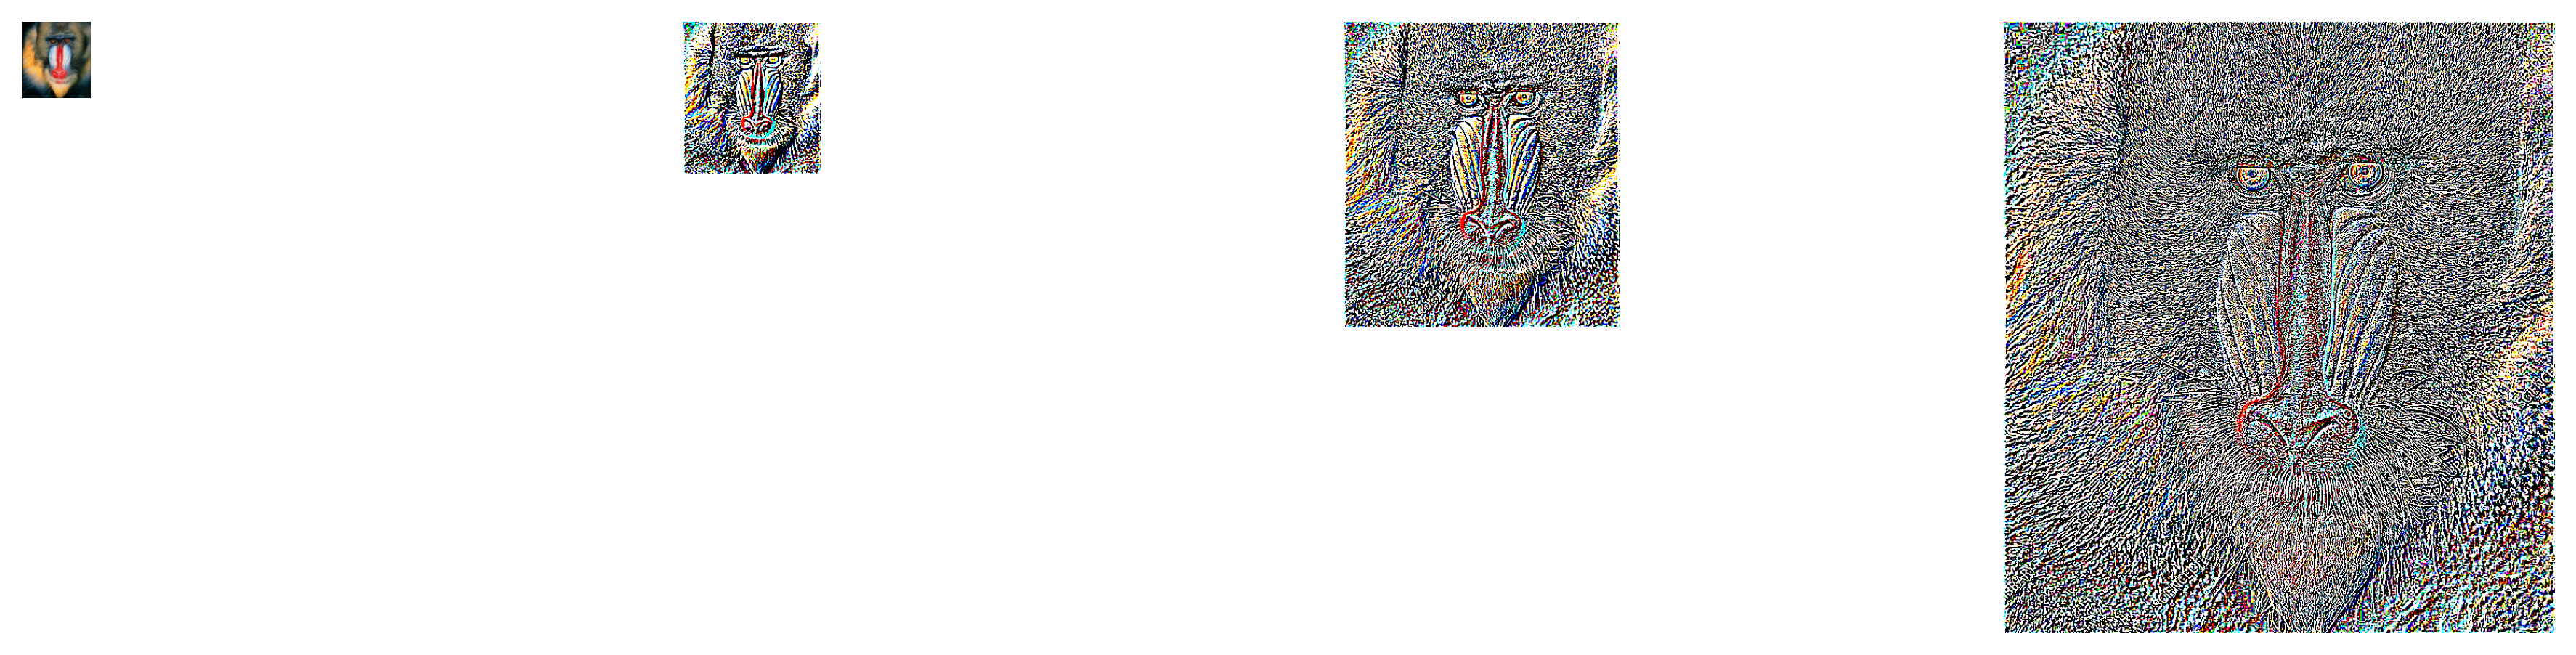

In [7]:
fig, axs = plt.subplots(
    nrows=1, ncols=number_of_pyramids, figsize=(15, 7),
    dpi=300, sharex = True, sharey = True
)

for i, ax in enumerate(axs):
    ax.imshow(laplacian_pyramid[number_of_pyramids - i -1 ])
    ax.set_xticks([])
    ax.set_yticks([])
    for side in ['top', 'right', 'left', 'bottom']:
        ax.spines[side].set_visible(False)

plt.show()

This is how you actually create the pyramids

In [ ]:
laplacian_pyramid = [ gaussian_pyramid[-1].copy() ]
N = len(gaussian_pyramid)
for i in range( N - 1 ):
    im_small = gaussian_pyramid[ N-1-i ].copy()
    im_big   = gaussian_pyramid[ N-1-i-1 ].copy()
    new_big  = resize( im_small, im_big.shape, 'cubic' )
    laplacian_pyramid.insert( 0, im_big - new_big )

In [ ]:
fig, axs = plt.subplots(
    nrows=1, ncols=number_of_pyramids, figsize=(15, 7),
    dpi=300, sharex = True, sharey = True
)

for i, ax in enumerate(axs):
    ax.imshow(laplacian_pyramid[number_of_pyramids - i -1 ])
    ax.set_xticks([])
    ax.set_yticks([])
    for side in ['top', 'right', 'left', 'bottom']:
        ax.spines[side].set_visible(False)

plt.show()